In [80]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [81]:
# Load your FLAC file (replace with your actual path)
audio_path = r"C:\Users\nield\Desktop\GitHub\Music-Structure-Analysis\DO NOT TOUCH\Audio Files\Emmanuel\01. Vitalic - Polkamatic.flac"  # ← CHANGE THIS
y, sr = librosa.load(audio_path, sr=None)

hop_length = 4096  # Define it once here


In [82]:
def extract_features(y, sr, hop_length):
    # Rhythmogram: onset strength
    onset_env = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
    rhythm = librosa.util.normalize(onset_env).reshape(1, -1)
    #rhythm = librosa.times_like(onset_env, sr=sr)

    # Timbregram: MFCCs
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=hop_length)
    timbre = librosa.util.normalize(mfcc)

    # Chromagram: Harmony
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length)
    harmony = librosa.util.normalize(chroma)

    return rhythm, timbre, harmony


In [83]:
rh, ti, ch = extract_features(y, sr, hop_length=hop_length)


In [84]:
def compute_self_similarity(feature):
    feature = feature.T  # shape: (frames, features)
    dist = cdist(feature, feature, metric='euclidean')
    return dist

sim_rh = compute_self_similarity(rh)
sim_ti = compute_self_similarity(ti)
sim_ch = compute_self_similarity(ch)


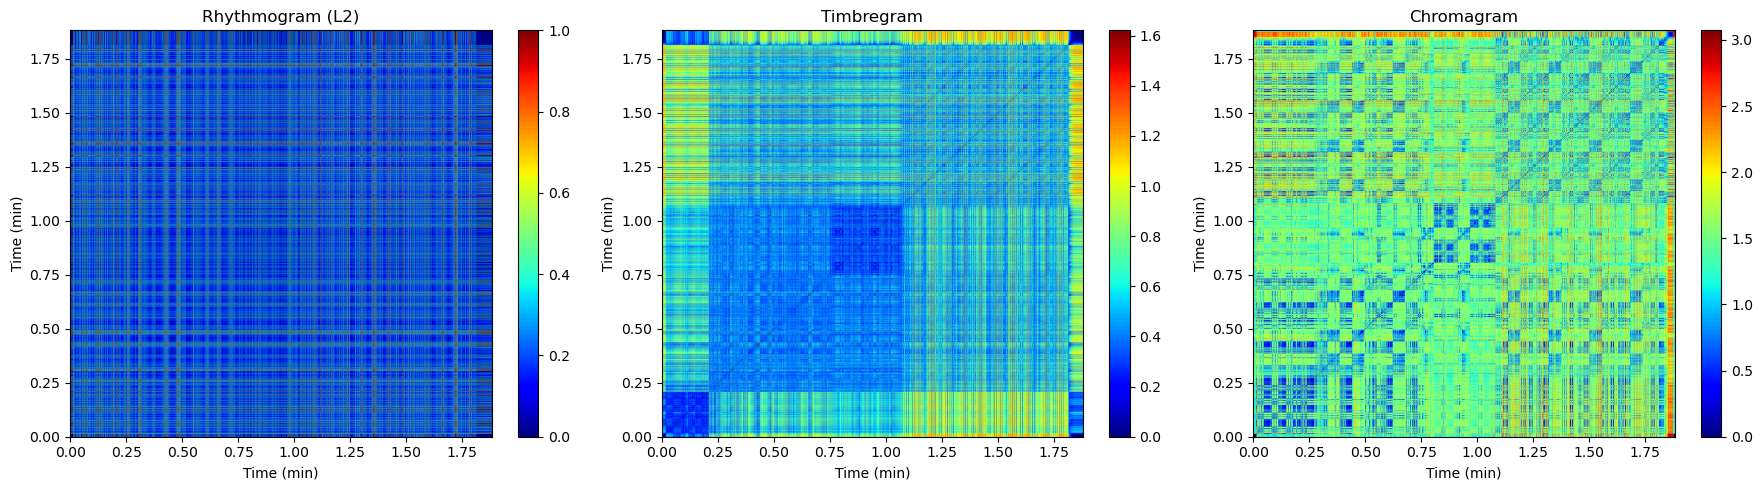

In [85]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

features = [sim_rh, sim_ti, sim_ch]
titles = ['Rhythmogram (L2)', 'Timbregram', 'Chromagram']

for i in range(3):
    sim_matrix = features[i]
    ax = axs[i]

    # Convert frame indices to time in minutes
    times_sec = librosa.frames_to_time(np.arange(sim_matrix.shape[0]), sr=sr,hop_length=hop_length)
    times_min = times_sec / 60.0

    # Show image with minute-based axes
    im = ax.imshow(sim_matrix, origin='lower', cmap='jet',
                   extent=[times_min[0], times_min[-1], times_min[0], times_min[-1]],
                   aspect='auto')

    ax.set_title(titles[i])
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('Time (min)')
    fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()